# Imports

In [1]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import os

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Data

In [ ]:
# need: feldpar_df, 

In [3]:
figure_folder = '../../Figures/DataGeneration/'

os.makedirs(figure_folder, exist_ok=True)

In [5]:
data_folder = '../Data/'
df = pd.read_pickle(data_folder + "DetectorReadings.pkl")
bins = df['bins'].values
df = df.drop(columns=['bins'])
df.index = bins
exp_df = pd.read_pickle(data_folder + 'ExpirementData.pkl')

In [60]:
material_names = ['Silica', 'Kaolinite', 'Smectite', 'Montmorillonite', 'Quartz', 'Chlorite', 'Mica', 'Feldspar']
compound_names = ['SiO2', 'Al2O3', 'H2O', 'Na2O', 'Fe2O3', 'MgO', 'C']
elem_names = ['Si', 'Al', 'H', 'Na', 'O', 'Fe', 'Mg', 'C']
target_materials = ['Coconut']

In [88]:
material_exp_df = exp_df[exp_df['function'].isin(material_names)]
material_filenames = material_exp_df['filename']
material_df = df[material_filenames]

feldspar_exp_df = exp_df[exp_df['function'].str.contains("Feldspar")]
feldspar_filenames = feldspar_exp_df['filename']
feldspar_df = df[feldspar_filenames]

compound_exp_df = exp_df[exp_df['function'].isin(compound_names)]
compound_filenames = compound_exp_df['filename']
compound_df = df[compound_filenames]

element_exp_df = exp_df[exp_df['function'].isin(elem_names)]
element_filenames = element_exp_df['filename']
element_df = df[element_filenames]

target_exp_df = exp_df[exp_df['function'].isin(target_materials)]
target_filenames = target_exp_df['filename']
target_df = df[target_filenames]

# Plots

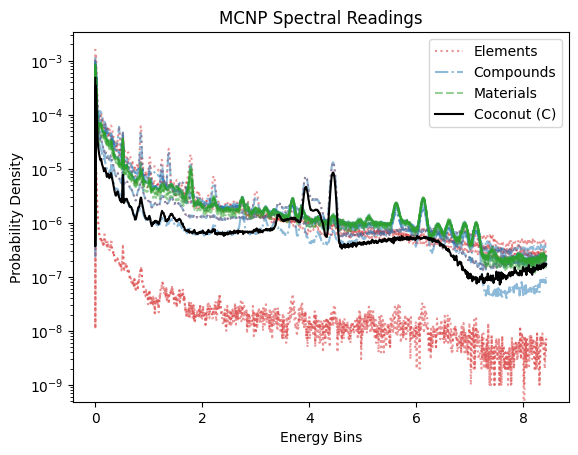

In [ ]:
# Example Spectral Reading
plt.figure()
plt.plot(element_df.index, element_df.values, alpha=0.5, linestyle=':', color='tab:red')
plt.plot(compound_df.index, compound_df.values, alpha=0.5, linestyle='dashdot', color='tab:blue')
plt.plot(material_df.index, material_df.values, alpha=0.5, linestyle='dashed', color='tab:green')
plt.plot(target_df.index, target_df.values, alpha=1, linestyle='solid', color='black')
# make a legend with the names of the materials
custom_lines = [
    Line2D([0], [0], color='tab:red', linestyle=':', alpha=0.5),
    Line2D([0], [0], color='tab:blue', linestyle='dashdot', alpha=0.5),
    Line2D([0], [0], color='tab:green', linestyle='dashed', alpha=0.5),
    Line2D([0], [0], color='black', linestyle='solid', alpha=1)
]
plt.legend(custom_lines, ['Elements', 'Compounds', 'Materials', 'Coconut (C)'], loc='upper right')
plt.xlabel('Energy Bins')
plt.ylabel('Probability Density')
plt.yscale('log')
plt.title('MCNP Spectral Readings')
plt.savefig(figure_folder + 'MCNPSpectralReading.png', bbox_inches='tight')
plt.show()

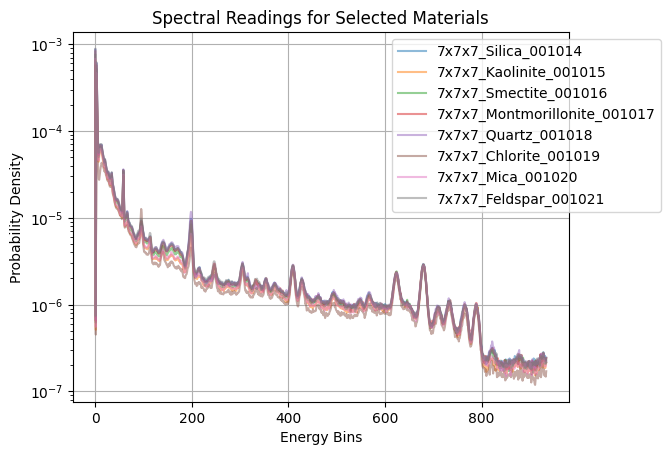

In [58]:
plt.figure()
plt.plot(df[_filenames].values, alpha=0.5)
plt.title('Spectral Readings for Selected Materials')
plt.xlabel('Energy Bins')
plt.ylabel('Probability Density')
plt.yscale('log')
plt.legend(_filenames, loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid()
plt.savefig(figure_folder + 'SpectralReadings.png', bbox_inches='tight')
plt.show()

In [38]:
df[_filenames].values.T.shape

(8, 935)

In [39]:
(np.ones(len(_filenames)) / len(_filenames)).shape

(8,)

In [41]:
df.shape

(935, 175)

In [40]:
# Weighted sum (average) across the selected columns
weighted_sum = np.dot(df[_filenames].values, np.ones(len(_filenames)) / len(_filenames))
weighted_sum

array([7.58381000e-04, 6.14875000e-07, 5.29216000e-04, 3.63277750e-04,
       1.71275625e-04, 7.93755000e-05, 5.18810000e-05, 4.82283750e-05,
       5.33735000e-05, 5.96147500e-05, 6.27350000e-05, 6.27496250e-05,
       6.15366250e-05, 6.21641250e-05, 5.66428750e-05, 5.28788750e-05,
       4.91117500e-05, 4.61072500e-05, 4.29956250e-05, 4.03392500e-05,
       4.39231250e-05, 3.95388750e-05, 3.69976250e-05, 3.47512500e-05,
       3.24993750e-05, 3.07363750e-05, 3.13441250e-05, 3.10182500e-05,
       2.96673750e-05, 2.79265000e-05, 2.63176250e-05, 2.63867500e-05,
       2.71002500e-05, 2.70788750e-05, 3.05048750e-05, 2.61981250e-05,
       2.24931250e-05, 2.13753750e-05, 2.01970000e-05, 1.86196250e-05,
       1.73255000e-05, 1.63428750e-05, 1.55652500e-05, 1.49553750e-05,
       1.49227500e-05, 1.50973750e-05, 1.49031250e-05, 1.45888750e-05,
       1.39713750e-05, 1.34493750e-05, 1.27611250e-05, 1.22445000e-05,
       1.17455000e-05, 1.19321250e-05, 1.19552500e-05, 1.10390000e-05,
      

In [42]:
# df functions that include "Feldspar"
df.filter(like="Feldspar")

,7x7x7_Feldspar_001021,7x7x7_C_0060_Feldspar_Fill_003133,7x7x7_C_0120_Feldspar_Fill_003134,7x7x7_C_0180_Feldspar_Fill_003135,7x7x7_C_0240_Feldspar_Fill_003136,7x7x7_C_0300_Feldspar_Fill_003137,7x7x7_C_0360_Feldspar_Fill_003138,7x7x7_C_0420_Feldspar_Fill_003139,7x7x7_C_0480_Feldspar_Fill_003140,7x7x7_C_0540_Feldspar_Fill_003141,7x7x7_C_0600_Feldspar_Fill_003142,7x7x7_C_1000_Feldspar_Fill_003143,7x7x7_C_2000_Feldspar_Fill_003144,7x7x7_C_3000_Feldspar_Fill_003145,7x7x7_C_4000_Feldspar_Fill_003146,7x7x7_C_5000_Feldspar_Fill_003147,7x7x7_C_6000_Feldspar_Fill_003148,7x7x7_C_7000_Feldspar_Fill_003149,7x7x7_C_8000_Feldspar_Fill_003150,7x7x7_C_9000_Feldspar_Fill_003151
0.000000,8.803080e-04,8.790070e-04,8.784680e-04,8.774330e-04,8.767580e-04,8.752060e-04,8.739630e-04,8.732300e-04,8.723020e-04,8.715770e-04,8.708300e-04,8.658780e-04,8.508560e-04,8.344220e-04,8.186930e-04,7.965010e-04,7.680210e-04,7.302290e-04,6.736890e-04,5.929290e-04
0.000010,7.440000e-07,7.440000e-07,7.340000e-07,7.370000e-07,7.580000e-07,7.510000e-07,7.570000e-07,7.450000e-07,7.190000e-07,7.410000e-07,7.270000e-07,7.320000e-07,6.490000e-07,6.600000e-07,6.210000e-07,6.160000e-07,6.460000e-07,6.000000e-07,5.630000e-07,4.980000e-07
0.009045,6.229900e-04,6.221050e-04,6.211590e-04,6.209900e-04,6.203820e-04,6.204520e-04,6.197560e-04,6.193290e-04,6.188660e-04,6.182240e-04,6.173560e-04,6.133160e-04,6.039490e-04,5.949720e-04,5.841830e-04,5.686090e-04,5.504250e-04,5.216640e-04,4.817800e-04,4.259010e-04
0.018080,4.331900e-04,4.328740e-04,4.324900e-04,4.322310e-04,4.319520e-04,4.313280e-04,4.305720e-04,4.301710e-04,4.308710e-04,4.301800e-04,4.298310e-04,4.275570e-04,4.219220e-04,4.156770e-04,4.081580e-04,3.991210e-04,3.856030e-04,3.669890e-04,3.391830e-04,2.990280e-04
0.027114,2.063080e-04,2.063180e-04,2.062770e-04,2.062000e-04,2.059570e-04,2.056920e-04,2.055310e-04,2.057890e-04,2.060010e-04,2.059770e-04,2.056070e-04,2.042030e-04,2.030920e-04,2.003200e-04,1.971800e-04,1.929110e-04,1.870590e-04,1.780250e-04,1.638170e-04,1.442870e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8.393360,2.370000e-07,2.600000e-07,2.510000e-07,2.400000e-07,2.510000e-07,2.470000e-07,2.490000e-07,2.470000e-07,2.420000e-07,2.380000e-07,2.410000e-07,2.430000e-07,2.320000e-07,2.590000e-07,2.550000e-07,2.560000e-07,2.460000e-07,2.070000e-07,2.080000e-07,1.760000e-07
8.402400,2.430000e-07,2.380000e-07,2.310000e-07,2.320000e-07,2.500000e-07,2.500000e-07,2.420000e-07,2.300000e-07,2.370000e-07,2.330000e-07,2.310000e-07,2.200000e-07,2.390000e-07,2.420000e-07,2.170000e-07,2.470000e-07,2.250000e-07,2.130000e-07,2.130000e-07,1.850000e-07
8.411430,2.370000e-07,2.370000e-07,2.350000e-07,2.390000e-07,2.330000e-07,2.320000e-07,2.360000e-07,2.400000e-07,2.450000e-07,2.500000e-07,2.600000e-07,2.500000e-07,2.420000e-07,2.420000e-07,2.340000e-07,2.430000e-07,2.150000e-07,2.220000e-07,2.050000e-07,1.790000e-07
8.420470,2.120000e-07,2.320000e-07,2.360000e-07,2.270000e-07,2.170000e-07,2.240000e-07,2.150000e-07,2.130000e-07,2.100000e-07,2.160000e-07,2.290000e-07,2.590000e-07,2.240000e-07,2.260000e-07,2.370000e-07,2.450000e-07,2.170000e-07,2.090000e-07,1.990000e-07,1.740000e-07


In [49]:
feldspar_exp_df = exp_df[exp_df['function'].str.contains("Feldspar")]
feldspar_df = df[feldspar_exp_df['filename']]

In [52]:
feldspar_exp_df['avg_carbon_portion']

21     0.000
156    0.006
157    0.012
158    0.018
159    0.024
160    0.030
161    0.036
162    0.042
163    0.048
164    0.054
165    0.060
166    0.100
167    0.200
168    0.300
169    0.400
170    0.500
171    0.600
172    0.700
173    0.800
174    0.900
Name: avg_carbon_portion, dtype: float64